<a href="https://colab.research.google.com/github/godot107/Colaboratory/blob/main/Time_Series_Prediction_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global Data Science Project incorporates a challenge/problem to predict anomlies using time series data.  Practing elements here and self-learning here

Goals:
1. Decide on a machine learning model and from what library... fbprophet, tslearn, sklearn, tsfresh.

Concepts:
1. 

Research/Resources:
1. Getting started:
  - https://medium.com/@jetnew/anomaly-detection-of-time-series-data-e0cb6b382e33
  - https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection
  - Tutorial/Good quick Start: https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
2. EDA: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
3. Time Series Classification: https://medium.com/@kostyantyn.tatarnikov/classification-of-anomalous-time-series-6066d63db920
4. Scoping tsfresh:
  - https://www.ksk-anl.com/blog/time-series-as-supervised-learning-tsfresh-for-classification/
  - https://www.kaggle.com/chandrimad31/using-tsfresh-time-series-feature-engineering
  - https://tsfresh.com/  
5. Scoping fbprophet:
  - Documentation: https://facebook.github.io/prophet/docs/quick_start.html#python-api
  - https://medium.com/seismic-data-science/anomaly-detection-using-prophet-a5dcea2c5473
  - https://towardsdatascience.com/anomaly-detection-time-series-4c661f6f165f
    - also includes some code
  - Anomaly Detection model on Time Series data in Python
    - https://www.youtube.com/watch?v=0wfOOl5XtcU
  - fbprophet builds onto of Sklearn.
Future Endeavors:
1. understanding ARIMA
2. Feels like elements of this exercise can apply to stock trading.

Notes:


*   As we're learning different models, trying to pick the pros and cons of each. It seems that k-means have limitations. See (https://medium.com/seismic-data-science/anomaly-detection-using-prophet-a5dcea2c5473)




In [ ]:
# Run at start of kernel
!pip install tsfresh
!pip install tslearn
!pip install statsmodels
!pip install fbprophet

In [ ]:
# Import Libraries

from google.colab import drive
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tslearn.clustering import TimeSeriesKMeans
import statsmodels.api as sm
from fbprophet import Prophet

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Sandbox


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Sandbox


In [ ]:
# Import data:

"""
Source: https://love.statoil.com/Form?locationId=HOVDEN&version=1
"""

data = pd.read_csv("Salinity.csv", names= ['year', 'month', 'day', 'hour', 'minute', 'second', 'millisecond', 'Salinity'], skiprows= 2 )

**Pre-processing**

References: 



*   https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas/37103131
*   https://stackoverflow.com/questions/11073609/how-to-group-dataframe-by-a-period-of-time

*   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
*   https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe







In [ ]:
# Pre-processing


data['ds'] = pd.to_datetime(data[['year','month','day', 'hour', 'minute', 'second','millisecond']])


# Trying to groupby a time interval

data_reshaped = data.resample('H', on='ds').Salinity.mean()

# total amount of NA rows. periods without a data point.
data_reshaped.isna().sum()
data_reshaped = data_reshaped.dropna(how='all')


Visualizations



*   Reference: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
*   



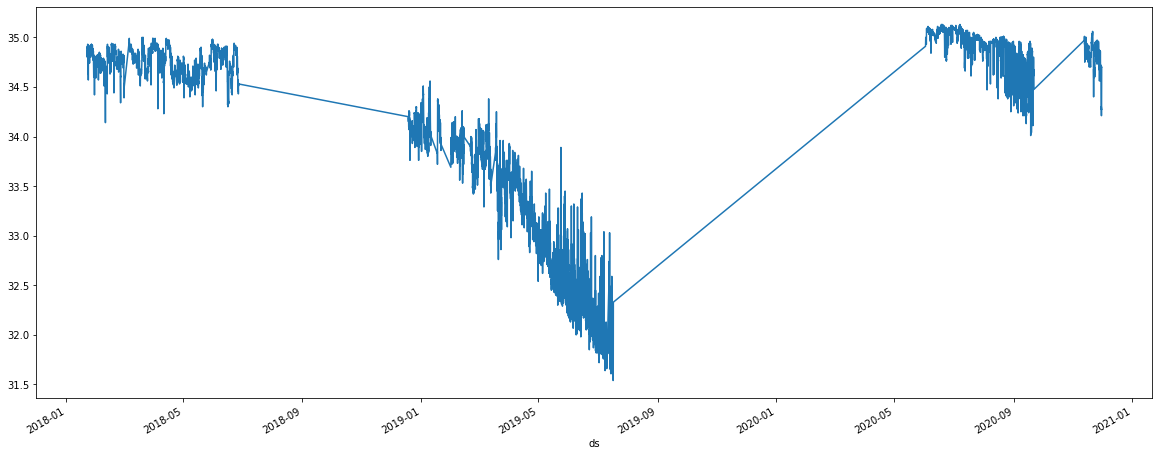

In [ ]:
# Visualization:

#data['Salinity'].plot(figsize = (20,8))

data_reshaped.plot(figsize = (20,8))

**Feature Engineering**



1.   Reference: https://stackoverflow.com/questions/62071901/how-to-use-tsfresh-python-package-to-extract-features-from-time-series-data
2.   List item



In [ ]:
# Feature Engineering
data_FE = pd.DataFrame(data_reshaped) # convert Panda series into DataFrame
data_FE['id'] = 1
data_FE = data_FE.reset_index() 

extracted_features = extract_features(data_FE, column_id="id", column_sort = 'ds')
extracted_features 


Feature Extraction: 100%|██████████| 1/1 [01:49<00:00, 109.85s/it]


,Salinity__variance_larger_than_standard_deviation,Salinity__has_duplicate_max,Salinity__has_duplicate_min,Salinity__has_duplicate,Salinity__sum_values,Salinity__abs_energy,Salinity__mean_abs_change,Salinity__mean_change,Salinity__mean_second_derivative_central,Salinity__median,Salinity__mean,Salinity__length,Salinity__standard_deviation,Salinity__variation_coefficient,Salinity__variance,Salinity__skewness,Salinity__kurtosis,Salinity__absolute_sum_of_changes,Salinity__longest_strike_below_mean,Salinity__longest_strike_above_mean,Salinity__count_above_mean,Salinity__count_below_mean,Salinity__last_location_of_maximum,Salinity__first_location_of_maximum,Salinity__last_location_of_minimum,Salinity__first_location_of_minimum,Salinity__percentage_of_reoccurring_values_to_all_values,Salinity__percentage_of_reoccurring_datapoints_to_all_datapoints,Salinity__sum_of_reoccurring_values,Salinity__sum_of_reoccurring_data_points,Salinity__ratio_value_number_to_time_series_length,Salinity__sample_entropy,Salinity__maximum,Salinity__minimum,Salinity__benford_correlation,Salinity__time_reversal_asymmetry_statistic__lag_1,Salinity__time_reversal_asymmetry_statistic__lag_2,Salinity__time_reversal_asymmetry_statistic__lag_3,Salinity__c3__lag_1,Salinity__c3__lag_2,...,Salinity__number_crossing_m__m_0,Salinity__number_crossing_m__m_-1,Salinity__number_crossing_m__m_1,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_0,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_1,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_2,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_3,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_4,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_5,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_6,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_7,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_8,Salinity__energy_ratio_by_chunks__num_segments_10__segment_focus_9,Salinity__ratio_beyond_r_sigma__r_0.5,Salinity__ratio_beyond_r_sigma__r_1,Salinity__ratio_beyond_r_sigma__r_1.5,Salinity__ratio_beyond_r_sigma__r_2,Salinity__ratio_beyond_r_sigma__r_2.5,Salinity__ratio_beyond_r_sigma__r_3,Salinity__ratio_beyond_r_sigma__r_5,Salinity__ratio_beyond_r_sigma__r_6,Salinity__ratio_beyond_r_sigma__r_7,Salinity__ratio_beyond_r_sigma__r_10,Salinity__count_above__t_0,Salinity__count_below__t_0,Salinity__lempel_ziv_complexity__bins_2,Salinity__lempel_ziv_complexity__bins_3,Salinity__lempel_ziv_complexity__bins_5,Salinity__lempel_ziv_complexity__bins_10,Salinity__lempel_ziv_complexity__bins_100,Salinity__fourier_entropy__bins_2,Salinity__fourier_entropy__bins_3,Salinity__fourier_entropy__bins_5,Salinity__fourier_entropy__bins_10,Salinity__fourier_entropy__bins_100,Salinity__permutation_entropy__dimension_3__tau_1,Salinity__permutation_entropy__dimension_4__tau_1,Salinity__permutation_entropy__dimension_5__tau_1,Salinity__permutation_entropy__dimension_6__tau_1,Salinity__permutation_entropy__dimension_7__tau_1
1,0.0,1.0,0.0,1.0,363179.11,1.241520e+07,0.054465,-0.000016,0.000003,34.64,34.159059,10632.0,0.937265,0.027438,0.878465,-1.057622,-0.1317,579.02,2756.0,2991.0,6572.0,4060.0,0.798062,0.757524,0.723476,0.723382,0.938667,0.997837,11751.245,362393.35,0.035271,0.097462,35.13,31.54,0.062915,-0.064247,-0.13379,-0.408357,39946.220635,39945.455791,...,0.0,0.0,0.0,0.103685,0.10358,0.103118,0.100234,0.097344,0.093809,0.089658,0.100911,0.104352,0.103308,0.769281,0.202032,0.129327,0.064052,0.008653,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.013638,0.023796,0.043454,0.09161,0.29383,0.045395,0.090729,0.090729,0.200814,0.857293,1.710955,2.957797,4.366749,5.878783,7.313162


**Implementing ARIMA**

Reference: 


*   Documentation: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
*   How to move index to column: https://stackoverflow.com/questions/21767900/how-to-move-pandas-data-from-index-to-column-after-multiple-groupby/53008807
* https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
* Tutorial: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

Goals:
1. Need to learn how to interpret this
2. Need to flatten the time series



In [ ]:
# ARIMA 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_reshaped, order=(5,1,0)) # data_reshaped is a series
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:             D.Salinity   No. Observations:                10631
Model:                 ARIMA(5, 1, 0)   Log Likelihood                8665.156
Method:                       css-mle   S.D. of innovations              0.107
Date:                Thu, 11 Feb 2021   AIC                         -17316.311
Time:                        00:53:05   BIC                         -17265.410
Sample:                             1   HQIC                        -17299.134
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.773e-05      0.001     -0.029      0.977      -0.001       0.001
ar.L1.D.Salinity    -0.2933      0.010    -30.247      0.000      -0.312      -0.274
ar.L2.D.Salinity    -0.1679 

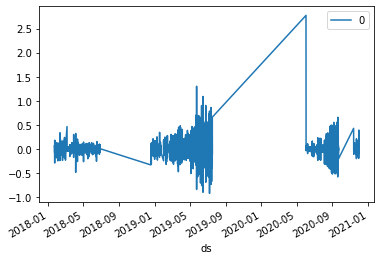

In [ ]:
# ARIMA Visualization

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

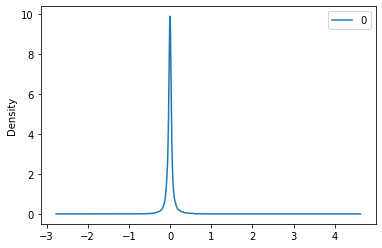

                  0
count  10631.000000
mean      -0.000001
std        0.107101
min       -0.920656
25%       -0.027554
50%       -0.001009
75%        0.022462
max        2.776494


In [ ]:
# Density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

**Building the Machine Learning Model**

Concepts:
1. Windowing.

References
1.   https://towardsdatascience.com/a-brief-introduction-to-time-series-classification-algorithms-7b4284d31b97
2.   https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3
3.   https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html
4.   https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
5.   Intuition/Good Resource: https://www.influxdata.com/blog/why-use-k-means-for-time-series-data-part-one/
6.   K-means application: https://www.influxdata.com/blog/why-use-k-means-for-time-series-data-part-two/
7.   More Detailed: http://amid.fish/anomaly-detection-with-k-means-clustering



In [ ]:
# Input Data
fb_df = data_reshaped.reset_index()[['ds', 'Salinity']].rename(columns= {"Salinity":"y"})
fb_df

# Building the Prophet Model
m = Prophet()
m.fit(fb_df)

# Adding future dates
future = m.make_future_dataframe(periods=365)

# Predict the salinity
forecast = m.predict(future)

#
results = pd.concat([fb_df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis = 1)

# 
results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

results[results['error'].abs() > 1.5 * results['uncertainty']]
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5 * x['uncertainty']) else 'No', axis = 1)




In [ ]:
# Results of the Model

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-22 17:09:24.777,34.854927,34.656878,35.062555,34.854927,34.854927,-0.000994,-0.000994,-0.000994,0.004602,0.004602,0.004602,0.009643,0.009643,0.009643,-0.015239,-0.015239,-0.015239,0.0,0.0,0.0,34.853933
1,2018-01-22 18:49:24.673,34.854837,34.656210,35.063765,34.854837,34.854837,-0.002668,-0.002668,-0.002668,-0.000083,-0.000083,-0.000083,0.012637,0.012637,0.012637,-0.015221,-0.015221,-0.015221,0.0,0.0,0.0,34.852169
2,2018-01-22 19:39:24.620,34.854792,34.654431,35.050473,34.854792,34.854792,-0.001089,-0.001089,-0.001089,0.000115,0.000115,0.000115,0.014010,0.014010,0.014010,-0.015215,-0.015215,-0.015215,0.0,0.0,0.0,34.853703
3,2018-01-22 20:29:24.570,34.854747,34.649021,35.046431,34.854747,34.854747,0.001680,0.001680,0.001680,0.001595,0.001595,0.001595,0.015295,0.015295,0.015295,-0.015210,-0.015210,-0.015210,0.0,0.0,0.0,34.856427
4,2018-01-22 21:19:24.520,34.854702,34.654899,35.052902,34.854702,34.854702,0.004113,0.004113,0.004113,0.002833,0.002833,0.002833,0.016487,0.016487,0.016487,-0.015207,-0.015207,-0.015207,0.0,0.0,0.0,34.858815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027,2021-11-26 10:20:43.987,33.501374,29.424336,37.829629,29.302489,37.749329,0.114579,0.114579,0.114579,-0.003721,-0.003721,-0.003721,0.007135,0.007135,0.007135,0.111165,0.111165,0.111165,0.0,0.0,0.0,33.615953
11028,2021-11-27 10:20:43.987,33.498203,29.345477,37.845161,29.281143,37.761426,0.092843,0.092843,0.092843,-0.003721,-0.003721,-0.003721,0.000734,0.000734,0.000734,0.095829,0.095829,0.095829,0.0,0.0,0.0,33.591046
11029,2021-11-28 10:20:43.987,33.495033,29.342033,37.851438,29.260963,37.769974,0.042500,0.042500,0.042500,-0.003721,-0.003721,-0.003721,-0.033513,-0.033513,-0.033513,0.079734,0.079734,0.079734,0.0,0.0,0.0,33.537533
11030,2021-11-29 10:20:43.987,33.491862,29.226316,37.858940,29.241151,37.789938,0.054333,0.054333,0.054333,-0.003721,-0.003721,-0.003721,-0.004987,-0.004987,-0.004987,0.063041,0.063041,0.063041,0.0,0.0,0.0,33.546194


TypeError: ignored

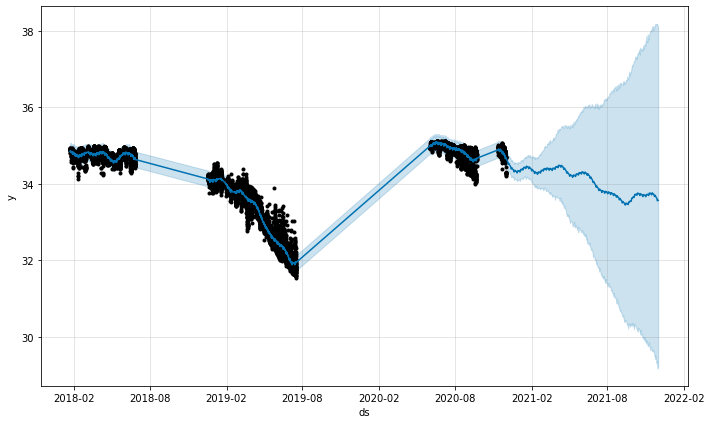

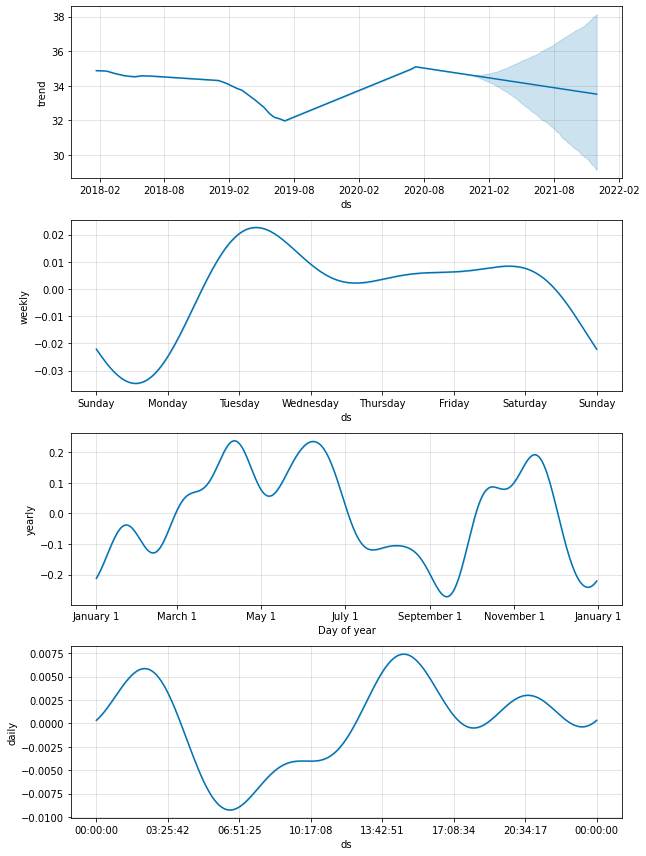

In [ ]:
# Data visualization

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)

fig3 = plt.scatter(results.reset_index(), x = 'ds',y = 'y', color = 'anomaly')


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
# Building a Model


km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
                           max_iter_barycenter=5,
                           random_state=0).fit(data_reshaped.reset_index())





TypeError: ignored

In [ ]:
# Sandbox
results.reset_index()
fig3 = plt.scatter(results.reset_index(), x = 'ds',y = 'y', color = 'anomaly')

TypeError: ignored

In [ ]:
fb_df.set_index('ds')['y']

ds
2018-01-22 17:00:00    34.87
2018-01-22 18:00:00    34.81
2018-01-22 19:00:00    34.80
2018-01-22 20:00:00    34.89
2018-01-22 21:00:00    34.91
                       ...  
2020-11-30 06:00:00    34.32
2020-11-30 07:00:00    34.70
2020-11-30 08:00:00    34.69
2020-11-30 09:00:00    34.70
2020-11-30 10:00:00    34.70
Name: y, Length: 10632, dtype: float64

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km.fit(X_train)

In [ ]:
# Attempting to graph daily and weekly.  Doesn't work yet.

salinity_weekly_mean = data_reshaped.resample('W').mean()
salinity_daily_mean = data_reshaped.resample('D').mean()

# Start and end of the date range to extract
start, end = '2019-03', '2019-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(salinity_daily_mean.loc[start:end, 'Salinity'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(salinity_weekly_mean.loc[start:end, 'Salinity'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Salinity')
ax.legend();
